# **Достаем данные**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import numpy as np

In [ ]:
# user_list = []
# #user_list.append('username')
# for i in range(6):
#   url = "https://movies.stackexchange.com/users?page={}&tab=Reputation&filter=all".format(i)
#   response = requests.get(url)
#   soup = BeautifulSoup(response.text, "html.parser")
#   user_blocks = soup.find_all("div", {"class": "user-details"})
#   for user_block in user_blocks:
#       user_list.append('https://movies.stackexchange.com' + user_block.find("a")["href"])
# pd.DataFrame(user_list).to_csv("user_list.csv", index=False, header=False)

In [ ]:
# user_list = pd.read_csv("user_list.csv", header=None)[0].tolist()

# user_url = user_list[0]
# question_list = []

# for page in range(1, 1000):
#     response = requests.get(user_url + f"?tab=answers&sort=votes&page={page}")
#     soup = BeautifulSoup(response.text, "html.parser")
#     question_blocks = soup.find_all("div", {"class": "s-post-summary--content"})
#     for question_block in question_blocks:
#         question_list.append('https://movies.stackexchange.com' +
#            question_block.find("a")["href"]
#         )
#     # если на странице нет вопросов, то выходим из цикла
#     if len(question_blocks) == 0:
#         break
#     # чтобы не забанили, ждем 1 секунду
#     time.sleep(1)

# pd.DataFrame(question_list).to_csv("question_list.csv", index=False, header=False)

In [ ]:
# # Создание пустой таблицы для хранения данных
# #results = []

# for question_url in question_list[1101:]:
#     response = requests.get(question_url)
#     soup = BeautifulSoup(response.text, "html.parser")

#     # Извлечение данных из вопроса
# #    question_title = soup.find("a", {"class": "postcell"}).text
# #    print("Question:", question_title)

#     # Извлечение ответов на вопрос
#     answer_cells = soup.find_all("div", {"class": "post-layout"})
#     i = 0
#     for answer_cell in answer_cells:
#         try:
#             answer_text = answer_cell.find("div", {"class": "js-post-body"}).text.strip()
#             last_author = answer_cell.find_all("div", {"class": "user-details"})[-1]
#             author_name = last_author.find("a").text
#             reputation = last_author.find("span", {"class": "reputation-score"}).text
#             likes = answer_cell.find("div", {"class": "js-vote-count"}).text
#             print("Answer:", answer_text)
#             print("Author:", author_name)
#             print("Reputation:", reputation)
#             print("Likes:", likes)

#             # Добавление данных в таблицу
#             is_question = True if i == 0 else False
#             results.append((question_url, i, is_question, answer_text, author_name, reputation, likes))
#             i += 1
#             # Ожидание 1 секунды перед следующим запросом
#             time.sleep(1)
#         except Exception as e:
#             pass

In [ ]:
# pd.DataFrame(results).to_csv("answers.csv", index=False, header=True)

In [ ]:
data=pd.read_csv('/content/answers.csv')

# **Смотрим на данные и обрабатываем**

In [ ]:
data.head(20)

,0,1,2,3,4,5,6
0,https://movies.stackexchange.com/questions/779...,0,True,I recall hearing once that there was a differe...,dvaeg,"3,409",158
1,https://movies.stackexchange.com/questions/779...,1,False,Found a couple of references although differen...,Paulie_D,131k,198
2,https://movies.stackexchange.com/questions/779...,2,False,"What are the rules, and is it consistent among...",Patrick Wynne,773,20
3,https://movies.stackexchange.com/questions/929...,0,True,"Sadly, it needed me to get to the 4th season, ...",Oliver Friedrich,945,89
4,https://movies.stackexchange.com/questions/929...,1,False,It's traditional (but not required except in t...,Paulie_D,131k,179
5,https://movies.stackexchange.com/questions/805...,0,True,I realise that this is a somewhat pedantic que...,DaG,"2,442",124
6,https://movies.stackexchange.com/questions/805...,1,False,"The director of Blade Runner 2049, Denis Ville...",Paulie_D,131k,148
7,https://movies.stackexchange.com/questions/805...,2,False,While Paulie_D already gives a very good answe...,Napoleon Wilson,58.5k,16
8,https://movies.stackexchange.com/questions/897...,0,True,"In Season 2 Episode 1, after Mycroft explodes ...",Simpleton,849,41
9,https://movies.stackexchange.com/questions/897...,1,False,No this is not a mistake.\nIt's just a British...,Paulie_D,131k,147


In [ ]:
#Изменили репутацию, сделали из нее обычные числа и формат float
data['5'] = data['5'].str.replace(',', '')
data['5'] = data['5'].apply(lambda x: float(x[:-1]) * 1000 if x.endswith('k') else float(x))

In [ ]:
data.shape

(3372, 7)

# **Строим граф**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26576 (\N{CJK UNIFIED IDEOGRAPH-67D0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34081 (\N{CJK UNIFIED IDEOGRAPH-8521}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32988 (\N{CJK UNIFIED IDEOGRAPH-80DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26460 (\N{CJK UNIFIED IDEOGRAPH-675C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

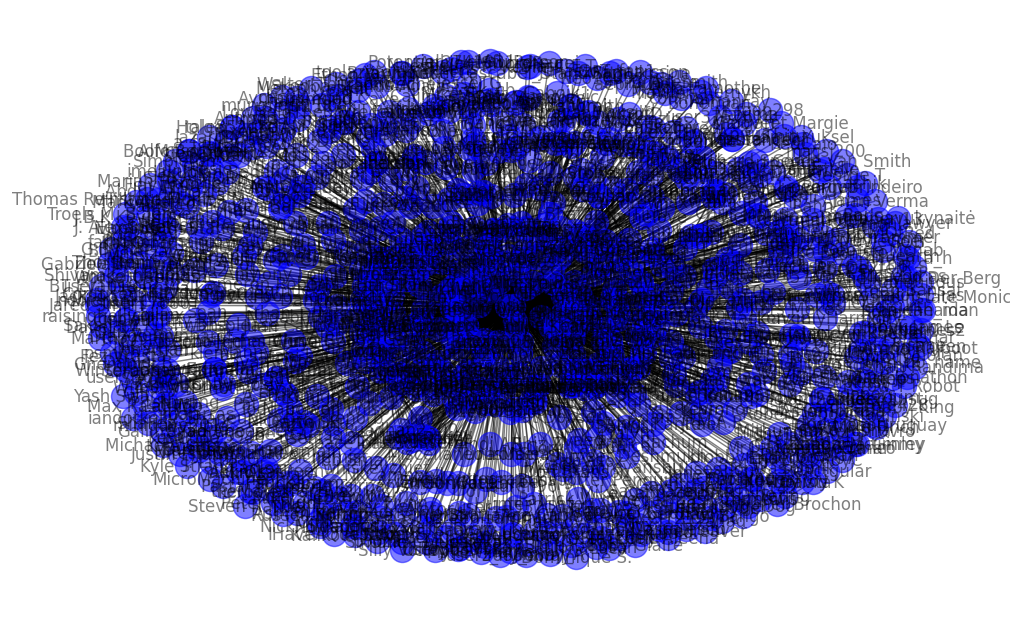

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# создаем пустой граф
G = nx.Graph()

# проходимся по каждому вопросу и связываем ответчиков, которые на него отвечали
for question in set(data['0']):
    answers = data[data['0'] == question]
    for i, answer1 in answers.iterrows():
        for j, answer2 in answers.iterrows():
            if i != j:
                if answer1['4']!=answer2['4']:
                  if G.has_edge(answer1['4'], answer2['4']):
                    G[answer1['4']][answer2['4']]['weight'] += 1
                  else:
                    G.add_edge(answer1['4'], answer2['4'])
                    G[answer1['4']][answer2['4']]['weight'] = 1

#community detection
# рисуем граф синих узлов (узлов вопросов)
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='blue', alpha=0.5)
plt.show()

# **Описательные статистики графа**

**Центральности**

In [ ]:
# Вычисление различных мер центральности
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
# Вывод результатов
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

# Меры центральности включают степень центральности (degree_centrality), близость центральности (closeness_centrality) и центральность посредничества (betweenness_centrality)

Degree Centrality:
Node Johnny Bones: 0.037827352085354024
Node Rahul: 0.005819592628516004
Node Paulie_D: 1.0
Node Prem Gupta: 0.0009699321047526673
Node Panther: 0.0019398642095053346
Node David K: 0.0019398642095053346
Node Christopher Brochon: 0.0019398642095053346
Node king of panes: 0.0019398642095053346
Node Sumeet Deshmukh: 0.0019398642095053346
Node DForck42: 0.008729388942774006
Node Yasskier: 0.0019398642095053346
Node Muhammad Fahad: 0.0019398642095053346
Node Flater: 0.016488845780795344
Node Darth Locke: 0.01842870999030068
Node Rippy: 0.0019398642095053346
Node BlueMoon93: 0.016488845780795344
Node conman: 0.0009699321047526673
Node mojarras: 0.0009699321047526673
Node Thomas Wileh John: 0.0019398642095053346
Node matt_black: 0.002909796314258002
Node Oliver Friedrich: 0.0009699321047526673
Node Gnemlock: 0.0009699321047526673
Node Allen R. Brady: 0.002909796314258002
Node Tetsujin: 0.016488845780795344
Node dna: 0.004849660523763337
Node Yu Zhang: 0.007759456838021339
N

In [ ]:
# Нахождение узла с наибольшей степенью центральности
max_degree_node = max(degree_centrality, key=degree_centrality.get)
print("Узел с наибольшей степенью центральности:")
print(f"Node: {max_degree_node}")
print(f"Degree Centrality: {degree_centrality[max_degree_node]}")

Узел с наибольшей степенью центральности:
Node: Paulie_D
Degree Centrality: 1.0


In [ ]:
# Нахождение узла с наибольшей близостью центральности
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
print("Узел с наибольшей близостью центральности:")
print(f"Node: {max_closeness_node}")
print(f"Closeness Centrality: {closeness_centrality[max_closeness_node]}")

Узел с наибольшей близостью центральности:
Node: Paulie_D
Closeness Centrality: 1.0


In [ ]:
# Нахождение узла с наибольшей центральностью посредничества
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
print("Узел с наибольшей центральностью посредничества:")
print(f"Node: {max_betweenness_node}")
print(f"Betweenness Centrality: {betweenness_centrality[max_betweenness_node]}")

Узел с наибольшей центральностью посредничества:
Node: Paulie_D
Betweenness Centrality: 0.9946234685902084


**Диаметр**

In [ ]:
# Вычисление диаметра графа
diameter = nx.diameter(G)
print(f"Диаметр графа: {diameter}")

Диаметр графа: 2


**Плотность**

In [ ]:
# Вычисление плотности графа
density = nx.density(G)
print(f"Плотность графа: {density}")

Плотность графа: 0.003983112654982368


# **Устанавливаем нужные библиотеки**

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=c910808b96dd1ed75c32b810204809baa2228cd0eb51800534a8204e15033d66
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
from node2vec import Node2Vec

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/paraphrase-TinyBERT-L6-v2')

# **Осуществляем подготовку входных параметров**

In [ ]:
node2vec = Node2Vec(G, dimensions=100, walk_length=80, num_walks=15, workers=10)
graph_model = node2vec.fit(window=10, min_count=1, batch_words=4)
author_embeddings={}

for i in range(len(data)):
  author_name=data.iloc[i][4]
  author_embeddings[author_name]=graph_model.wv.get_vector(author_name)

Computing transition probabilities:   0%|          | 0/1032 [00:00<?, ?it/s]

In [ ]:
#создаем пустые списки
question_text_embeddings=[]
answer_text_embeddings=[]
author_ratings=[]
question_ratings=[]
author_connection_embeddings=[]

In [ ]:
#Сразу заполняем списки нужными нам значениями
y = []
question_text_embedding=[]
question_rating=0

for i in range(len(data)):
  if data.iloc[i][2]==True:
    question_rating = data.iloc[i][6]
    question_text = data.iloc[i][3]
    question_text_embedding=model.encode(question_text)
  else:
    answer_text = data.iloc[i][3]
    answer_text_embedding=model.encode(answer_text)
    answer_text_embeddings.append(answer_text_embedding)
    question_text_embeddings.append(question_text_embedding)
    author_ratings.append(data.iloc[i][5])
    question_ratings.append(question_rating)
    author_connection_embeddings.append(author_embeddings[data.iloc[i][4]])
    y.append(data.iloc[i][6])
    print(i) #просто чтобы отслеживать прогресс, так сказать

1
2
4
6
7
9
11
13
14
15
17
18
19
20
21
22
24
26
27
28
29
30
31
33
34
36
37
39
40
41
43
44
46
48
49
51
53
54
56
57
58
60
61
63
64
65
67
68
69
70
71
72
73
74
75
76
77
78
79
80
82
83
85
86
88
89
90
92
93
94
95
96
98
99
100
102
104
105
107
109
111
112
113
115
116
117
119
121
122
123
125
126
127
129
130
131
133
135
136
137
139
141
142
143
144
145
147
148
149
151
153
155
156
157
159
161
162
164
166
167
169
170
171
172
174
175
176
177
179
181
182
184
186
187
189
190
191
192
193
194
196
197
198
200
201
203
205
206
207
208
210
211
212
213
214
216
217
219
220
221
223
224
226
228
229
230
232
234
235
236
237
238
239
240
242
243
244
245
246
247
249
250
251
253
255
256
258
259
261
262
263
264
266
267
269
270
272
274
275
277
278
280
281
282
284
286
288
289
290
292
294
295
296
298
299
301
302
304
305
306
307
309
310
311
312
314
316
317
319
320
321
322
323
325
327
329
331
333
335
336
338
339
341
343
344
346
348
350
352
353
355
356
357
358
359
361
363
365
367
368
370
372
373
375
376
378
380
382
383
385


# **Обучаем модели**

## **Обучим модель на рейтингах**

In [ ]:
X=[]
for i in range(len(y)):
  X.append(np.array([author_ratings[i]]))
  X[i]=np.concatenate((X[i], np.array([question_ratings[i]])))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Вывод предсказаний модели
y_pred = regr.predict(X_test)
print(y_pred)

[ 1.26215841e+01  7.19991333e+00  7.19991333e+00  4.45909627e+00
  2.27250000e+00  4.39412950e+00  2.49000000e+00  4.97678035e+00
  4.45909627e+00  3.68260490e+00  1.08007237e+01 -2.25650000e+00
  3.13341792e+00  1.08007237e+01  2.10500000e+00  9.83333333e-01
  2.99061905e+01  3.68260490e+00  4.79000000e+00  2.76380435e+00
  3.44503810e+01  5.44479602e+00 -2.53242857e+00  4.45909627e+00
  1.94567251e+01  5.44479602e+00  2.22816151e+01  8.91108949e+00
  4.45909627e+00  2.00000000e-01  9.71733625e+00  5.44479602e+00
  3.66176869e+00  1.08007237e+01  5.44479602e+00  4.97678035e+00
  1.34000000e+00  3.68260490e+00  4.45909627e+00  7.66000000e+00
  3.13341792e+00  1.61417543e+01  4.39412950e+00  3.15557858e+00
  1.61417543e+01  4.39412950e+00  2.66000000e+00  3.50867081e+01
  1.72600000e+01  2.23600000e+01  1.31000000e+00  5.70000000e-01
  1.08007237e+01  5.44479602e+00  7.93000000e+00  3.68260490e+00
  2.77000000e+00  3.13341792e+00 -6.50000000e-01  1.82479167e+01
  4.45909627e+00  7.23000

In [ ]:
score = regr.score(X_test, y_test)
print("Оценка модели на тестовых данных:", score)

Оценка модели на тестовых данных: 0.6177582781448736


## **Обучение модели на основе взаимосвязи авторов**

In [ ]:
X=[]
for i in range(len(y)):
  X.append(author_connection_embeddings[i])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regr.predict(X_test)
print(y_pred)

[10.49091286 10.49091286 10.49091286 10.49091286 10.78719597 10.49091286
 17.40105952 10.49091286 10.49091286 10.49091286 10.49091286 10.81599617
 10.49091286 10.49091286 -0.09073446  3.72904762 10.49091286 10.49091286
  3.27672619 10.25037477 10.49091286 10.49091286  5.60733333 10.49091286
 10.49091286 10.49091286 10.49091286 10.25037477 10.49091286  8.81478524
 10.49091286 10.49091286 10.49091286 10.49091286 10.49091286 10.49091286
  5.46458333 10.49091286 10.49091286  6.23441397 10.49091286 10.49091286
 10.49091286 10.49091286 10.49091286 10.49091286 20.15664286 10.49091286
 16.65942473  6.35371429 11.76816667 16.71019048 10.49091286 10.49091286
 -0.24003108 10.49091286  2.90233333 10.49091286  0.60583333 16.93963095
 10.49091286 11.3874141  10.25037477 10.49091286 10.49091286 10.49091286
 10.49091286 10.49091286 10.49091286 10.49091286  2.55866667 10.49091286
 10.49091286  0.11666667  2.71319641  7.63004945  4.81027155 10.49091286
 10.49091286 10.49091286 10.49091286  7.1358254   7

In [ ]:
score = regr.score(X_test, y_test)
print("Оценка модели на тестовых данных:", score)

Оценка модели на тестовых данных: 0.016163620333394246


## **Обучение модели на основе взаимосвязи авторов и их рейтинга**

In [ ]:
X=[]
for i in range(len(y)):
  X.append(np.array([author_ratings[i]]))
  X[i]=np.concatenate((X[i], author_connection_embeddings[i]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Вывод предсказаний модели
y_pred = regr.predict(X_test)
print(y_pred)

[10.49091286 10.49091286 10.49091286 10.49091286  3.24       10.49091286
 32.68780165 10.49091286 10.49091286 10.49091286 10.49091286 -1.34
 10.49091286 10.49091286 -0.11002644  6.62847222 10.49091286 10.49091286
  4.31225668 10.25037477 10.49091286 10.49091286 -1.9        10.49091286
 10.49091286 10.49091286 10.49091286 10.25037477 10.49091286  3.908
 10.49091286 10.49091286 10.49091286 10.49091286 10.49091286 10.49091286
  2.205      10.49091286 10.49091286  6.20586113 10.49091286 10.49091286
 10.49091286 10.49091286 10.49091286 10.49091286 13.67485714 10.49091286
 11.72201709  7.43961905  2.01        6.54       10.49091286 10.49091286
 -0.24003108 10.49091286  3.00658333 10.49091286  0.73333333 16.90963095
 10.49091286  6.16       10.25037477 10.49091286 10.49091286 10.49091286
 10.49091286 10.49091286 10.49091286 10.49091286  2.60895455 10.49091286
 10.49091286 -0.29        2.71319641  7.46188889  8.41933876 10.49091286
 10.49091286 10.49091286 10.49091286  8.16207143  3.485      1

In [ ]:
score = regr.score(X_test, y_test)
print("Оценка модели на тестовых данных:", score)

Оценка модели на тестовых данных: 0.02537637885743871


## **Общая модель, в которой есть все параметры**

In [ ]:
X=[]
for i in range(len(y)):
  X.append(question_text_embeddings[i])
  X[i]=np.concatenate((X[i], answer_text_embeddings[i]))
  X[i]=np.concatenate((X[i], np.array([author_ratings[i]])))
  X[i]=np.concatenate((X[i], np.array([question_ratings[i]])))
  X[i]=np.concatenate((X[i], author_connection_embeddings[i]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Вывод предсказаний модели
y_pred = regr.predict(X_test)
print(y_pred)

[10.46  4.87  7.01  3.37  4.56  2.12  3.48  2.28  5.54  4.47 14.48  3.17
  4.59 15.34  1.76  3.61 37.22  3.88  5.32  4.21 35.81  4.84 -0.21  5.06
 23.3   3.5  18.65 13.02  2.71  1.55  9.2   5.18  3.17 16.72  5.4   2.05
  7.46  4.17  3.87 12.28  2.94 13.42  4.79  3.6  15.31  4.38  8.84 46.
 10.13 16.91  3.03  8.16 10.14  5.18  8.86  3.11  2.98  1.84 -0.3  19.29
  4.85 14.44 11.23  4.65  2.22  9.2   5.11 17.23  3.57  4.68  6.34  5.04
  6.96 -0.22 15.43  4.67 22.04  9.4   4.4   3.39  3.66  6.53  9.06  4.55
 30.11  3.26  3.45  2.92  3.77  4.84  7.03 25.97  3.48 11.7   4.22  3.62
  2.97  5.35 20.98  5.38  5.6   9.87 19.56  1.16  4.21  7.91  2.23  2.88
 13.17 10.46  4.39  5.54  3.65  3.99  7.84  2.22  3.89  2.5   3.86  3.7
  2.6   4.89  4.98  1.99  4.14  5.71 15.88  4.28  6.12  4.29 22.15  8.94
  4.14  9.67  4.28  3.66  4.4  24.73  9.48  4.93  3.85  6.37 20.98  2.98
  3.11 12.17 37.21  5.45  8.51 10.4   5.42  2.67 29.55  3.05 21.37  1.76
 49.53  9.72  4.21 34.82 11.01  2.87 13.92 19.42 11.04

In [ ]:
score = regr.score(X_test, y_test)
print("Оценка модели на тестовых данных:", score)
#самая крутая модель

Оценка модели на тестовых данных: 0.6587424613492747
